In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
archivo = pd.read_csv("kindey stone urine analysis.csv")
df = pd.DataFrame(archivo)
df
#Gravity = specific gravity of urine
#ph = ph of urine
#osmo = osmolarity of urine
#cond = conductivity of urine
#urea = concentration of urea in urine
#calc = concentration of calcium in urine
#target = 0- absence of stone 1- presence of stone

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [3]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [4]:
stones = df[df["target"]==1]["target"].count()
wo_stone = df[df["target"]==0]["target"].count()
print(stones)
print(wo_stone)

34
45


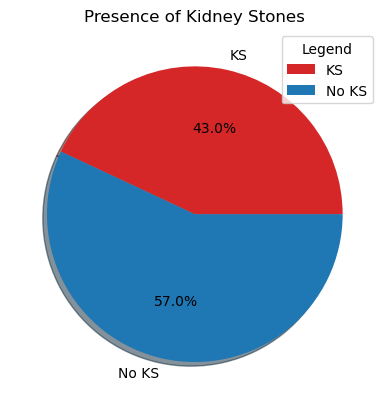

In [5]:
fig, ax = plt.subplots()

stone = ['KS', 'No KS']
counts = [stones, wo_stone]
pie_labels = ['KS', 'No KS']
pie_colors = ['tab:red', 'tab:blue']

ax.pie(counts, labels=pie_labels, colors=pie_colors, shadow=True, autopct="%1.1f%%", )

ax.set_title('Presence of Kidney Stones')
ax.legend(title='Legend')

plt.show()

<Axes: >

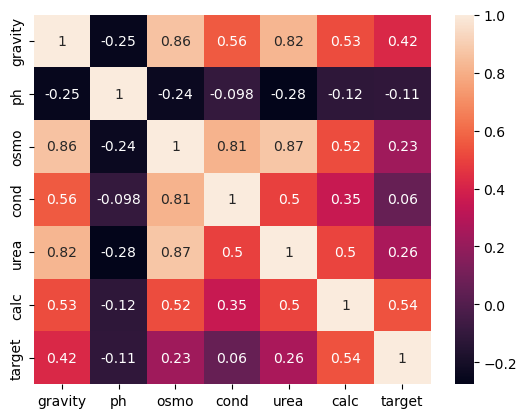

In [6]:
df.corr()
sns.heatmap(df.corr(), annot=True)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LogisticRegression()
x = df[["gravity","ph","osmo","cond","urea","calc"]].values
y = df["target"]
lin_reg.fit(x,y)

LogisticRegression()

In [9]:
coef = lin_reg.coef_
inter = lin_reg.intercept_
print("Coeficientes: ", coef)
print("Intercepto: ", inter)

Coeficientes:  [[-0.02630544 -0.19783033  0.00889306 -0.20874591 -0.00900856  0.57727403]]
Intercepto:  [-0.02872164]


In [10]:
from sklearn.metrics import accuracy_score

x_prueba = df[["gravity","ph","osmo","cond","urea","calc"]][69:]
print(x_prueba)

    gravity    ph  osmo  cond  urea   calc
69    1.026  6.29   833  22.2   457   4.45
70    1.028  4.76   312  12.4    10   0.27
71    1.027  5.40   840  24.5   395   7.64
72    1.018  5.14   703  29.0   272   6.63
73    1.022  5.09   736  19.8   418   8.53
74    1.025  7.90   721  23.6   301   9.04
75    1.017  4.81   410  13.3   195   0.58
76    1.024  5.40   803  21.8   394   7.82
77    1.016  6.81   594  21.4   255  12.20
78    1.015  6.03   416  12.8   178   9.39


In [11]:
prediction = lin_reg.predict(x_prueba.values)
print(prediction)

[0 0 1 1 1 1 0 1 1 1]


In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy: {:.3f}'.format(accuracy_score(y[69:].values, prediction)))

Accuracy: 0.700
